# Prediction using Supervised Machine Learning

## Task Description
1. Predict the percentage of an student based on the no. of study hours.
2. This is a sample linear regression task as it involves just 2 variables
3. What will be predicted score if a student studies for 9.25 hrs/day?

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

## Uploading dataset

In [2]:
url = "http://bit.ly/w-data"
ds = pd.read_csv(url)

In [3]:
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Summary of out DataFrame
info() method here gives information about a DataFrame including the index dtype and coloumns, non-null and memory usage

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Descriptive Statistics
Here, the describe() method is used. This method is used for calculating some statistical data like percentile, mean and std of the DataFrame used.

In [5]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Checking NaN values
isnull() method is used to check for all the null values in the dataset.

In [6]:
ds.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


By creating this heatmap we can visually identify NaN values

<AxesSubplot:>

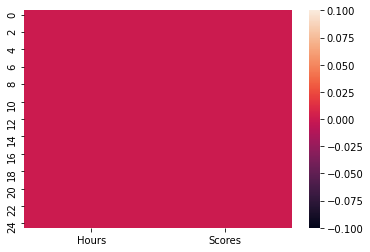

In [7]:
sns.heatmap(ds.isnull())

## Coorelation between fields
Scatterplot helps us to identify the type of relationship between the fields.

Text(0, 0.5, 'Percentage Score')

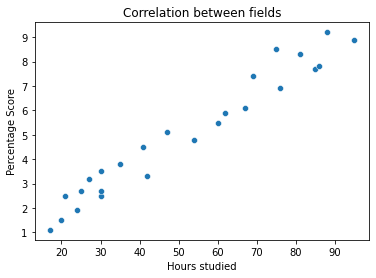

In [8]:
sns.scatterplot(x="Scores",y="Hours",data=ds)
plt.title('Correlation between fields')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')

We see that scores and hours are positively related to each other, that means the percentage score will increase if the number of hours studies increases

In [9]:
X = ds['Hours'].values.reshape(-1,1)
Y = ds['Scores'].values.reshape(-1,1)

## Splitting dataset into training and testing data
This can be done  by using train_test_split module from sklearn.model_selection

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Using Linear Regression to train model


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
plt.scatter(X,Y)

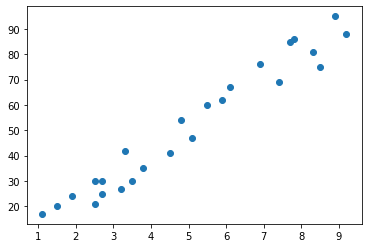

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
plt.scatter(X,Y)

## Actual Data vs Predicted Data 

In [12]:
result = pd.DataFrame({"Actual Data": y_test.reshape(5,),
                      "Predicted Data": pred.reshape(5,)})

In [13]:
result

,Actual Data,Predicted Data
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Making Predictions

Checking our given data on our trained model 

In [14]:
hours = [[9.25]] #value has to be in a 2D array
new_pred = model.predict(hours)
print("No of Hours =",hours[0][0])
print("Predicted Score =",new_pred[0])
print("Our Model can predict!")

No of Hours = 9.25
Predicted Score = [93.69173249]
Our Model can predict!


## Concluding, We'll check metrics values to find how effective our model is.
MSE: Mean Squared Error
MAE: Mean Absolute Error
RMSE: Root Mean Squared Error
This will help evaluating the performance of our model.

In [15]:
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MSE: 21.598769307217406
MAE: 4.183859899002975
RMSE: 4.647447612100367
